## 🎯 Projeto – Voting Regressão

Uma **HealthTech** realizou uma pesquisa com mais de 1.300 pessoas sobre gastos realizados com saúde nos últimos 2 anos para criar uma oferta mais assertiva de planos de saúde para pequenas e médias empresas. 

Dentre os componentes para formatar esta oferta, é importante conseguir estimar os gastos de saúde dos funcionários de uma possível empresa cliente, com base em algumas características destes funcionários.

---

Desta forma, para apoiar no desenvolvimento desta oferta, iremos trabalhar num **algoritmo de regressão** que possa **estimar os gastos de saúde de funcionários**.

📊 Considerando o volume de dados e as *features* disponíveis, adotaremos o **método Voting de ensemble, usando algoritmos supervisionados de regressão**.

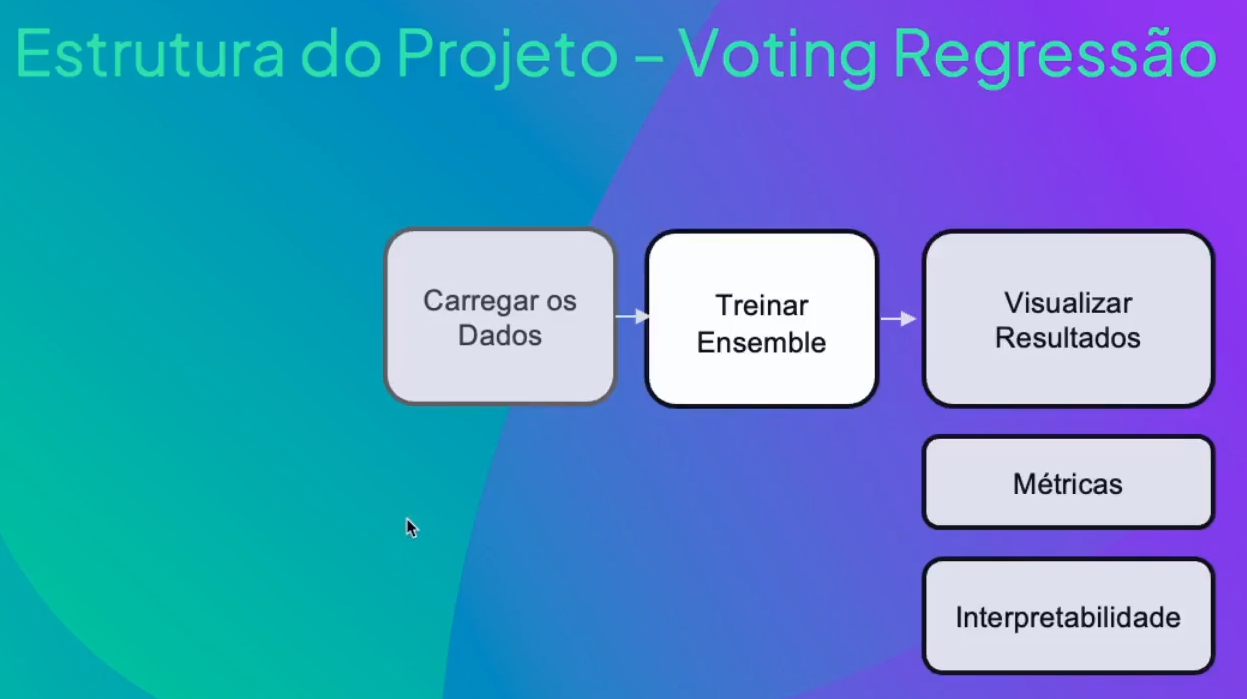

In [1]:
# Importar as bibliotecas

# EDA
import pandas as pd
import plotly.express as px
import numpy as np

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

### Carregar os dados

In [3]:
# Carregar os dados ja tratados
df_costs = pd.read_csv('./datasets/healthcosts_cleaned.csv')

In [4]:
# Mostrar as primeiras linhas
df_costs.head(10)

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
6,46,female,33.440,1,0,southeast,8240.58960
7,37,female,27.740,3,0,northwest,7281.50560
8,37,male,29.830,2,0,northeast,6406.41070
9,60,female,25.840,0,0,northwest,28923.13692


In [5]:
# Mostrar as ultimas linhas
df_costs.tail(10)

,age,sex,bmi,children,smoker,region,medical charges
1328,23,female,24.225,2,0,northeast,22395.74424
1329,52,male,38.600,2,0,southwest,10325.20600
1330,57,female,25.740,2,0,southeast,12629.16560
1331,23,female,33.400,0,0,southwest,10795.93733
1332,52,female,44.700,3,0,southwest,11411.68500
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500
1337,61,female,29.070,0,1,northwest,29141.36030


In [6]:
# Mostrar a estrutura
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   object 
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   int64  
 5   region           1338 non-null   object 
 6   medical charges  1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


### Preparação dos dados

In [7]:
# Preparar dados - Separar X e y
X = df_costs.drop(columns=['medical charges'])
y = df_costs['medical charges']

In [8]:
# Carregar o preprocessor
import joblib
preprocessor = joblib.load('./preprocessor_dataset_healthcosts.pkl')

In [9]:
# Dividir o dataset entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [10]:
# Aplicar o preprocessor
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [11]:
# Mostrar os conjuntos
print(f'Dados de Treinamento: {X_train.shape}')
print(f'Dados de Teste: {X_test.shape}')

Dados de Treinamento: (1070, 10)
Dados de Teste: (268, 10)


### Treinamento do Modelo

In [13]:
# Criar o objeto de Voting Regressor

lr_model = LinearRegression()
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=51)
tree_model = DecisionTreeRegressor(random_state=51)

voting_model = VotingRegressor(
    estimators=[
        ('linear regression', lr_model),
        ('elastic', elastic_model),
        ('decision tree', tree_model)
    ]
)

In [14]:
# Treinar o moedlo
voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('linear regression', LinearRegression()),
                            ('elastic', ElasticNet(random_state=51)),
                            ('decision tree',
                             DecisionTreeRegressor(random_state=51))])

### Análise dos Resultados

In [15]:
# Realizar predicao
y_pred = voting_model.predict(X_test)

In [16]:
# Mostrar y_pred
y_pred

array([ 9217.84324756, 37008.214315  , 11374.79944306, 16485.61643585,
       33523.57959374, 10906.60829277, 10064.0759939 , 13477.43213162,
        6694.5196024 , 10752.12413053,  9771.71722238, 11907.44614343,
        9129.69381172,  4375.84816398,  6123.13714659, 12766.66608398,
        5319.70147364,  6695.69784269, 21274.99480695, 23775.14628505,
        8613.78215304,  8299.29664822, 39009.59959457, 12426.10054886,
        6734.49655255, 15296.52943612, 11179.1244833 ,  3443.09667158,
       25436.86646569, 13841.41995046,  4176.2838956 , 25488.93614715,
        5082.43165229,  4973.21922747,  8101.31767983, 17187.85388374,
       11101.76416801,  3225.96291261, 11995.47851548,  8504.09366477,
       10921.75504986,  2528.38099281,  5951.93808847,  3462.8632558 ,
        8573.32174675, 13874.14421414, 13674.59485872, 34620.28987138,
        9023.51974679, 12615.034391  ,  6281.90485212, 31672.17680155,
        8470.61413631, 39976.86061535, 11497.03043224, 28412.58005401,
      

In [17]:
# Avaliar metricas do modelo
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
# Mostrar o Erro e R2
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 6240.904728783782
R2: 0.7760046197139258


In [19]:
# Calcular a importância das variáveis

importances = []

for estimador in voting_model.estimators_:
    # Se é um modelo linear, obtenha coef
    if hasattr(estimador, 'coef_'):
        importances.append(np.abs(estimador.coef_))
    # Se é um modelo de árvore, obtenha feature importance
    elif hasattr(estimador, 'feature_importances_'):
        importances.append(estimador.feature_importances_)
    else:
        print(f'Não foi possível carregar importância do modelo {type(estimador).__name__}')

In [20]:
importances[2].shape

(10,)

In [21]:
# Calcular a média das importâncias
importancia_media = np.mean(importances, axis=0)

In [22]:
# Normalizar as importâncias
feature_importance = importancia_media / np.sum(importancia_media)

In [23]:
# Obter os nomes das features
feature_names = preprocessor.get_feature_names_out()

In [24]:
# Criar um DataFrame com nomes e importância das features
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

In [26]:
# Ordenar o DataFrame pela importância
importance_df = importance_df.sort_values(by='importance', ascending=True)

In [27]:
# Criar um grafico para mostrar a importancia
fig = px.bar(
    importance_df,
    x='importance',
    y='feature',
    title='Importância das features – Voting Regressor',
    orientation='h'
)

fig.show()


In [28]:
# Mostrar evidência do Hard Voting (Média aritmética dos valores dos estimadores)

# Selecionar um registro para predição
X_sample = X_test[7].reshape(1, -1)

In [29]:
# Predições individuais dos estimadores
linear_pred = voting_model.named_estimators_['linear regression'].predict(X_sample)
elastic_pred = voting_model.named_estimators_['elastic'].predict(X_sample)
tree_pred = voting_model.named_estimators_['decision tree'].predict(X_sample)

In [30]:
# Predição final do Voting
voting_pred = voting_model.predict(X_sample)

In [31]:
# Média das predições dos estimadores
mean_pred = np.mean([linear_pred[0], elastic_pred[0], tree_pred[0]])

In [32]:
# Exibir os resultados
print(f'Predição da Regressão Linear: {linear_pred[0]}')
print(f'Predição do ElasticNet: {elastic_pred[0]}')
print(f'Predição da Árvore de Decisão: {tree_pred[0]}')

print(f'Média das Predições: {mean_pred}')
print(f'Predição final do Hard Voting: {voting_pred[0]}')

Predição da Regressão Linear: 14793.194288532955
Predição do ElasticNet: 13782.690606341423
Predição da Árvore de Decisão: 11856.4115
Média das Predições: 13477.432131624793
Predição final do Hard Voting: 13477.432131624793
